### Problem Statement: Predict delivery time using sorting time
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [223]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf


In [224]:
ds = pd.read_csv('delivery_time.csv')
ds.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Exploratory Data Analysis

In [225]:
ds.shape

(21, 2)

In [226]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [227]:
ds.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

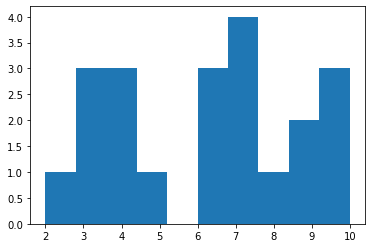

In [228]:
plt.hist(ds['Sorting Time'])

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

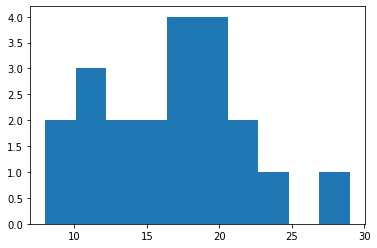

In [229]:
plt.hist(ds['Delivery Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

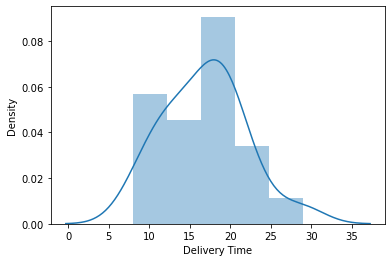

In [230]:
sns.distplot(ds['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

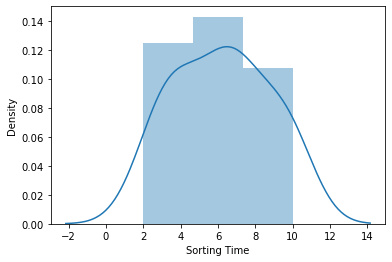

In [231]:
sns.distplot(ds['Sorting Time'])

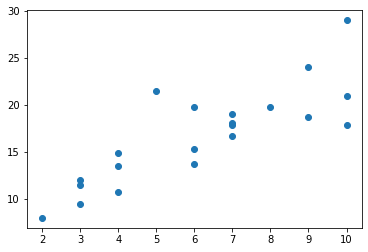

In [232]:
plt.scatter(ds['Sorting Time'],ds['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time'>

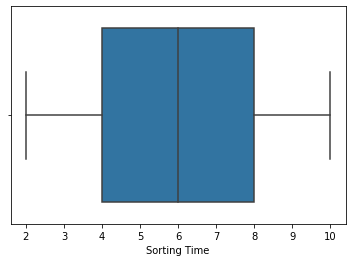

In [233]:
sns.boxplot(ds['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9ba2af3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9b83d6280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9ba2afa00>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9b593e8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9b593efd0>],
 'means': []}

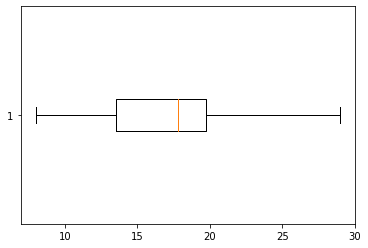

In [234]:
plt.boxplot(ds['Delivery Time'], vert=False)

Data for delivery time is left skewed , mean < median
data for sorting time is uniformly distribute as mean apporximately equal median

In [235]:
ds.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

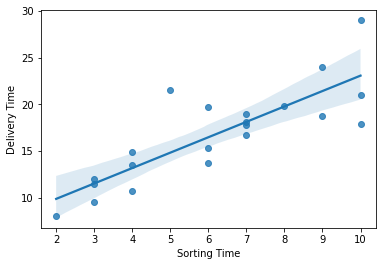

In [236]:
sns.regplot(ds['Sorting Time'], ds['Delivery Time'])

### Model Building

In [237]:
print(type(ds))
ds.head(2)

<class 'pandas.core.frame.DataFrame'>


,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [238]:
#renaming the column names
ds_1 = ds.rename({'Delivery Time':'DT', 'Sorting Time':'ST'},axis=1)
ds_1.head(5)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [239]:
model = smf.ols('DT~ST', ds_1).fit()
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [240]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 03 May 2022   Prob (F-statistic):           3.98e-06
Time:                        22:30:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
model.rsquared

0.6822714748417231

In [242]:
model_pred = model.predict()
model_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [243]:
rmse_val =  np.sqrt(np.mean((np.array(ds_1.DT)-np.array(model_pred))**2))
rmse_val

2.791650327061766

since rsquared value is very low using transformations

### Improving Accuracy -- using transformations

#### Log transformations

In [244]:
model_log = smf.ols('DT~np.log(ST)',ds_1).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 03 May 2022   Prob (F-statistic):           2.64e-06
Time:                        22:30:47   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
model_log.rsquared

0.6954434611324223

In [246]:
log_pred = model_log.predict(ds_1.ST)
log_pred.head(5)

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [247]:
rmse_log =  np.sqrt(np.mean((np.array(ds_1.DT)-np.array(log_pred))**2))
rmse_log

2.7331714766820663

Text(0, 0.5, 'Delivery Time')

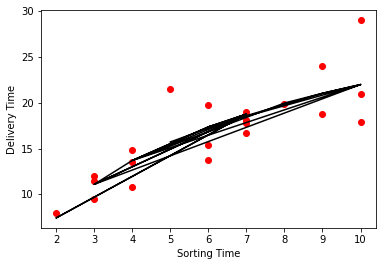

In [248]:
plt.scatter(ds_1.ST, ds_1.DT, color='red')
plt.plot(ds_1.ST, log_pred, color='black') # black line is predicted data
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

#### Using Exponential transformation

In [249]:
model_exp = smf.ols('np.log(DT)~ST', ds_1).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.59e-06
Time:                        22:30:56   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
model_exp.rsquared

0.7109478980584187

In [251]:
model_pred = model_exp.predict()
model_pred

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])

In [252]:
#since we have taken log we need to take exp
exp_pred = np.exp(model_pred)
exp_pred

array([23.9720324 , 12.72512323, 15.71603365, 21.57070699, 23.9720324 ,
       15.71603365, 17.46559665, 11.45042273, 23.9720324 , 21.57070699,
       19.40992704, 12.72512323, 17.46559665, 11.45042273, 11.45042273,
       12.72512323, 15.71603365, 17.46559665, 10.30341147, 17.46559665,
       14.14172779])

In [253]:
# calculating rmse
rmse_exp =  np.sqrt(np.mean((np.array(ds_1.DT)-np.array(exp_pred))**2))
rmse_exp

2.940250323056201

Text(0, 0.5, 'Delivery Time')

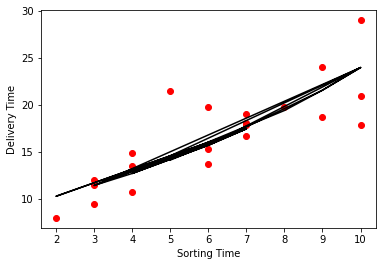

In [254]:
plt.scatter(ds_1.ST, ds_1.DT, color='red')
plt.plot(ds_1.ST, exp_pred, color='black') # black line is predicted data
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

#### Using log and both square  = quad transformations

In [255]:
ds_1['ST_sqr'] = ds_1.ST*ds_1.ST
ds_1.head(5)

,DT,ST,ST_sqr
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [256]:
model_quad = smf.ols('np.log(DT)~ST+ST_sqr', ds_1).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Tue, 03 May 2022   Prob (F-statistic):           2.20e-06
Time:                        22:31:09   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sqr        -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
model_quad.rsquared

0.7648666342953729

In [258]:
model_pred_1 = model_quad.predict(ds_1)
model_pred_1

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [259]:
quad_pred = np.exp(model_pred_1)
quad_pred

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [260]:
#shifting last column to first column position
final_ds = ds_1.copy()
first_column = final_ds.pop('ST')
final_ds.insert(0,'ST',first_column)
final_ds.head(5)

,ST,DT,ST_sqr
0,10,21.00,100
1,4,13.50,16
2,6,19.75,36
3,9,24.00,81
4,10,29.00,100


In [261]:
# calculating rmse
rmse_quad =  np.sqrt(np.mean((np.array(ds_1.DT)-np.array(quad_pred))**2))
rmse_quad

2.799041988740933

Text(0, 0.5, 'Delivery Time')

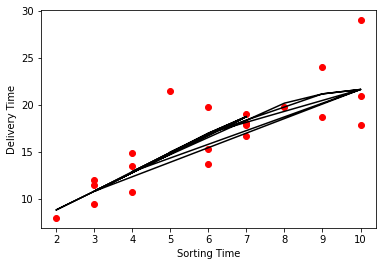

In [262]:
plt.scatter(ds_1.ST, ds_1.DT, color='red')
plt.plot(ds_1.ST, quad_pred, color='black') # black line is predicted data
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [263]:
model.rsquared

0.6822714748417231

In [264]:
final_data = pd.DataFrame()
final_data['Model'] = pd.Series(['statsmodel','Log model','exp model','quad model'])
final_data['RMSE Values'] = pd.Series([rmse_val,rmse_log,rmse_exp,rmse_quad])
final_data['Rsquare'] = pd.Series([model.rsquared,model_log.rsquared,model_exp.rsquared,model_quad.rsquared])

final_data

,Model,RMSE Values,Rsquare
0,statsmodel,2.791650,0.682271
1,Log model,2.733171,0.695443
2,exp model,2.940250,0.710948
3,quad model,2.799042,0.764867


### Predicting values -- using quad model

as accuracy is highest with quad model, also rmse value is least 

In [265]:
final_ds['Predicted DT'] = quad_pred
final_ds

,ST,DT,ST_sqr,Predicted DT
0,10,21.00,100,21.646921
1,4,13.50,16,12.909227
2,6,19.75,36,16.995933
3,9,24.00,81,21.176938
4,10,29.00,100,21.646921
5,6,15.35,36,16.995933
6,7,19.00,49,18.764526
7,3,9.50,9,10.825502
8,10,17.90,100,21.646921
9,9,18.75,81,21.176938


### Model Validation

1. mean value of standardized residuals should be zero
2. residuals should have constant variance

Text(0, 0.5, 'Standardized residuals')

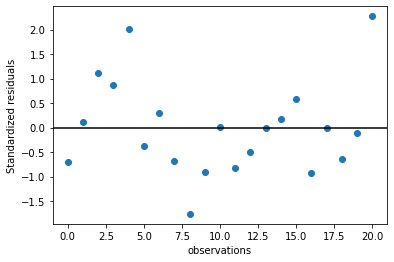

In [266]:
plt.plot(model.resid_pearson,'o')
plt.axhline(y=0, color='black')
plt.xlabel('observations')
plt.ylabel('Standardized residuals')

Text(0, 0.5, 'Standardized residuals')

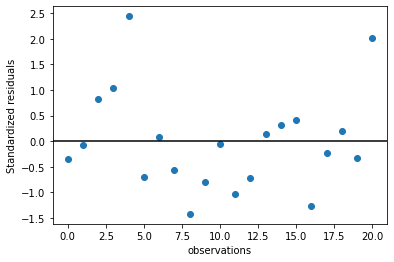

In [267]:
plt.plot(model_log.resid_pearson,'o')
plt.axhline(y=0, color='black')
plt.xlabel('observations')
plt.ylabel('Standardized residuals')

Text(0, 0.5, 'Standardized residuals')

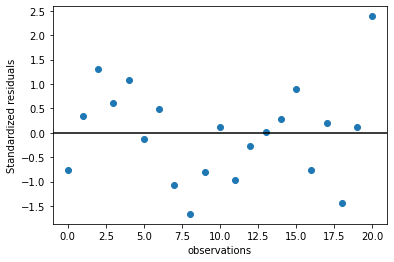

In [268]:
plt.plot(model_exp.resid_pearson,'o')
plt.axhline(y=0, color='black')
plt.xlabel('observations')
plt.ylabel('Standardized residuals')

(array([2., 2., 3., 2., 6., 2., 2., 1., 0., 1.]),
 array([-1.66402537, -1.25896163, -0.85389788, -0.44883414, -0.04377039,
         0.36129335,  0.7663571 ,  1.17142084,  1.57648459,  1.98154833,
         2.38661208]),
 <BarContainer object of 10 artists>)

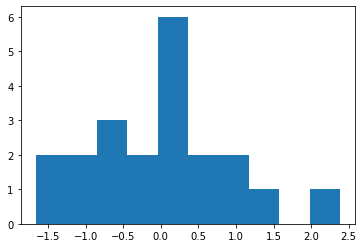

In [211]:
plt.hist(model_exp.resid_pearson)

Text(0, 0.5, 'Standardized residuals')

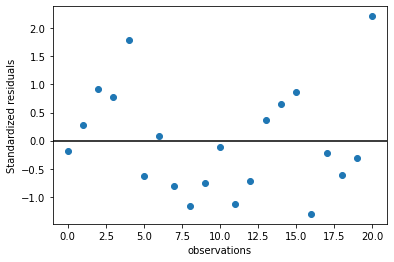

In [209]:
plt.plot(model_quad.resid_pearson,'o')
plt.axhline(y=0, color='black')
plt.xlabel('observations')
plt.ylabel('Standardized residuals')

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

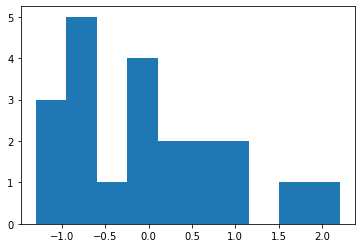

In [210]:
plt.hist(model_quad.resid_pearson)